# Migration experience premium (Chapter 2) - FIGURES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
figsize = [14.7,8.27] ## common used figure size to match laptop screen

# 1. Migration number plot
Plotting overall registered patents in Russia

In [2]:
import os
os.chdir('D:\KGZ_LiK\Chapter_2')
## Russian immigration rate, table contains migration data for KGZ
rusimgr = pd.read_excel('rus_imgr_lbr.xlsx')
work = rusimgr[rusimgr.migration == 'work'][['year', 'KGZ']] 
work = work.set_index('year').stack().reset_index().drop(columns = 'level_1')
work.columns = ['year', 'labor_migrants']

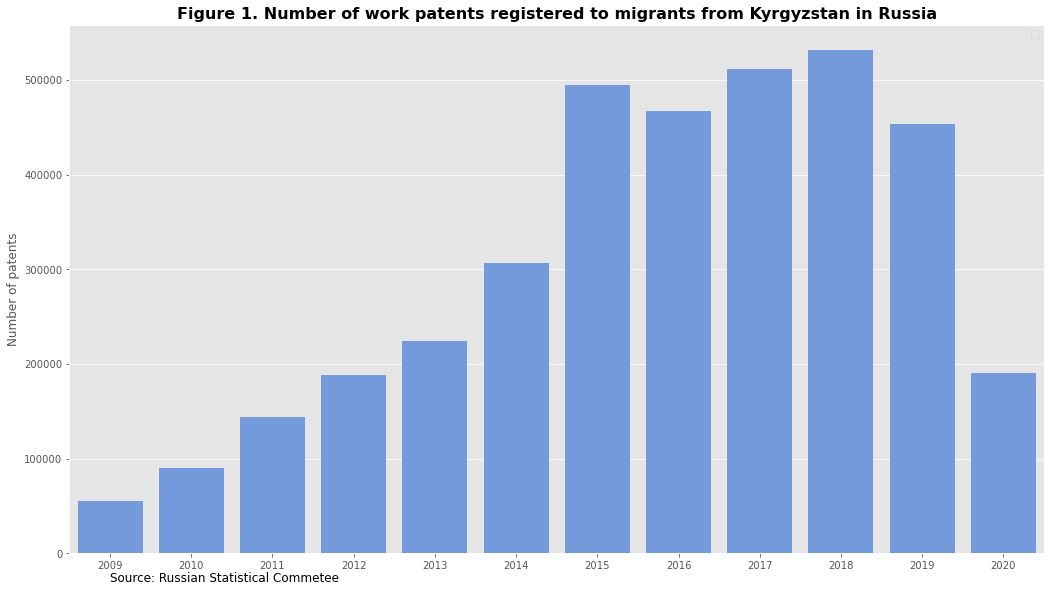

In [3]:
#plt.style.use('seaborn-darkgrid')
plt.style.use('ggplot')

plt.figure(figsize = figsize)
sns.barplot(data = work, x = 'year', y = 'labor_migrants', color = 'cornflowerblue')
#sns.lineplot(data = work.set_index('year'))
plt.title('Figure 1. Number of work patents registered to migrants from Kyrgyzstan in Russia', 
          fontsize = 16, fontweight="bold")
plt.ylabel('Number of patents', fontsize=12)
plt.xlabel('')
plt.legend('')
plt.text(0, -30000, 'Source: Russian Statistical Commetee', fontsize=12)
plt.tight_layout()
plt.savefig('D:\KGZ_LiK\Chapter_2\Fig_1_Migrant_number.jpg')
plt.show()

# 2. Return migrant share in KGZ-Lik Survey (2010-2019)

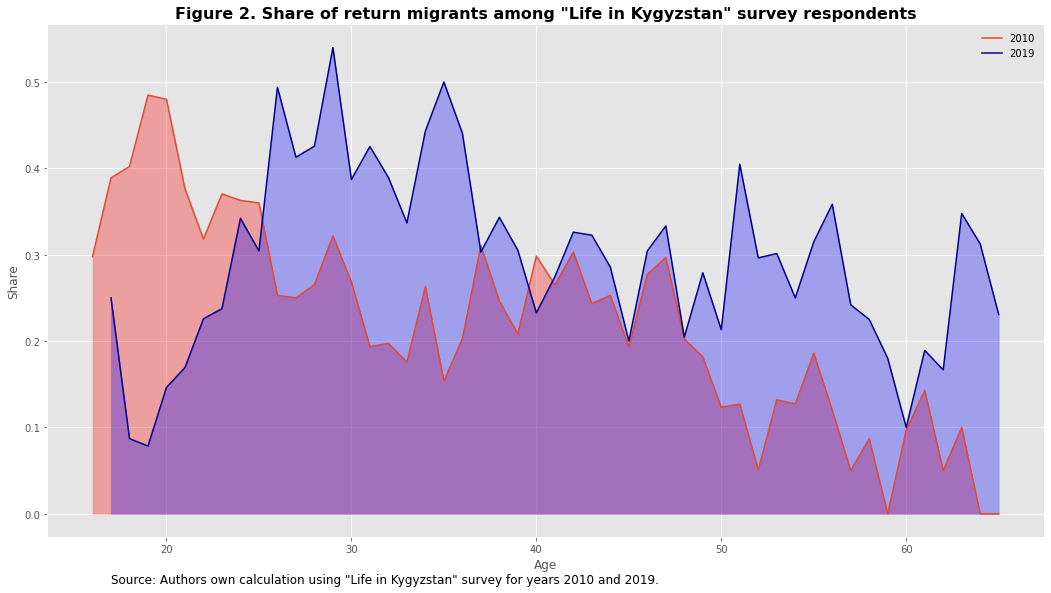

In [4]:
## Subset the data
df = pd.read_stata('data_2.dta')[['agegrpc', 'mp', 'age', 'year']]

# Plotting the data 

plt.figure(figsize = figsize)
plt.title('Figure 2. Share of return migrants among "Life in Kygyzstan" survey respondents', 
          fontsize = 16, fontweight="bold")
dfn = df.groupby(['year', 'age'])['mp'].mean().reset_index()
ax = sns.lineplot(data = dfn[dfn.year==2010], x = 'age', y = 'mp', label = '2010')
ax = sns.lineplot(data = dfn[dfn.year==2019], x = 'age', y = 'mp', label = '2019', color = 'darkblue')

l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="blue", alpha=0.3)

plt.xlabel('Age', fontsize = 12)
plt.ylabel('Share', fontsize = 12)
plt.legend(frameon = False)
plt.text(17, -0.08, 'Source: Authors own calculation using "Life in Kygyzstan" survey for years 2010 and 2019.', fontsize=12)
plt.tight_layout()
plt.savefig('D:\KGZ_LiK\Chapter_2\Fig_2_share_ret_migrants.jpg')
plt.show()

# 3. Oil rents per capita

In [5]:
import wbgapi as wb
def format_float(value):
    return f'{value:,.02f}'
pd.options.display.float_format = format_float

In [6]:
colnames = ['year', 'Real GDP per Cap', 'Oil Rents %GDP']
time = range(1990,2023)
query = ['NY.GDP.PCAP.PP.CD', 'NY.GDP.PETR.RT.ZS']
df = wb.data.DataFrame(query, 'RUS', time, index = 'time').reset_index()  ### Need to download the file and save!
df.columns = colnames
df['year'] = df['year'].str.replace('YR', '').astype(int)
df['Oil Rent per Cap'] = df['Real GDP per Cap']*df['Oil Rents %GDP']/100

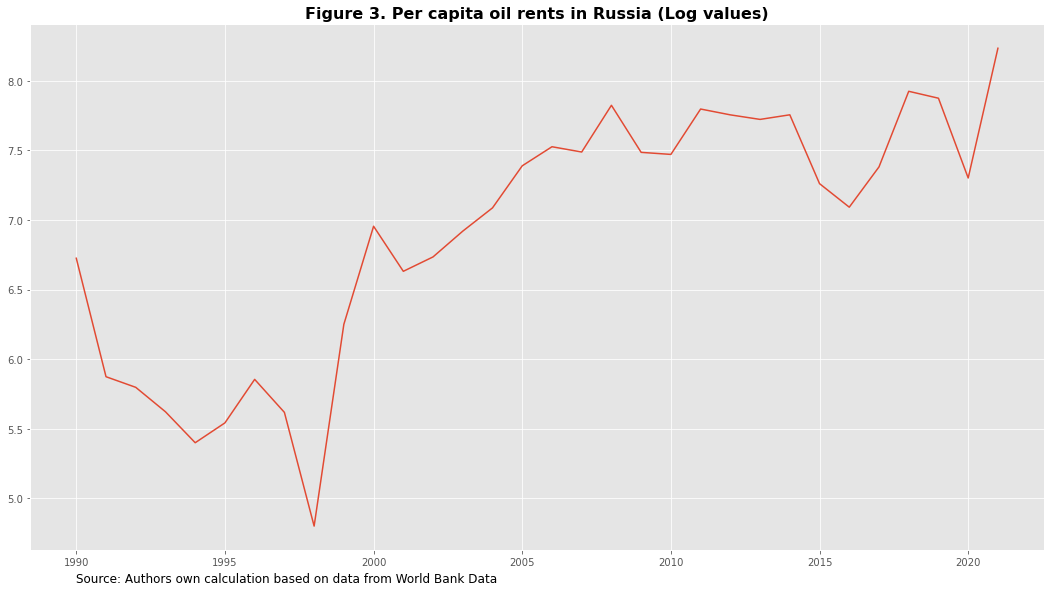

In [7]:
plt.style.use('ggplot')
plt.figure(figsize = (14.7,8.27))
plt.plot(df['year'], np.log(df['Oil Rent per Cap']))
plt.title('Figure 3. Per capita oil rents in Russia (Log values)', 
          fontsize = 16, fontweight="bold")
plt.text(1990, 4.40, 'Source: Authors own calculation based on data from World Bank Data', fontsize = 12)
plt.tight_layout()
plt.savefig('D:\KGZ_LiK\Chapter_2\Fig_3_oil_rents.jpg')
plt.show()

# 4. Migration duration expectation

In [8]:
df = pd.read_csv('2016_knomad_ilo_mcs_migration_survey.csv', encoding='latin-1')
df = df[df.current_country == 'russian federation']

D:\Moved_from_C\TEMP\ipykernel_7352\4068214031.py:1: DtypeWarning: Columns (29,30,36,37,136,191,199,206,210,221,225,232,236,247,251,256,289,314,325,330,366,368,372,374,384,386,390,392,402,404,408,415,416,417,507,511,518,520,521,569,570) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2016_knomad_ilo_mcs_migration_survey.csv', encoding='latin-1')


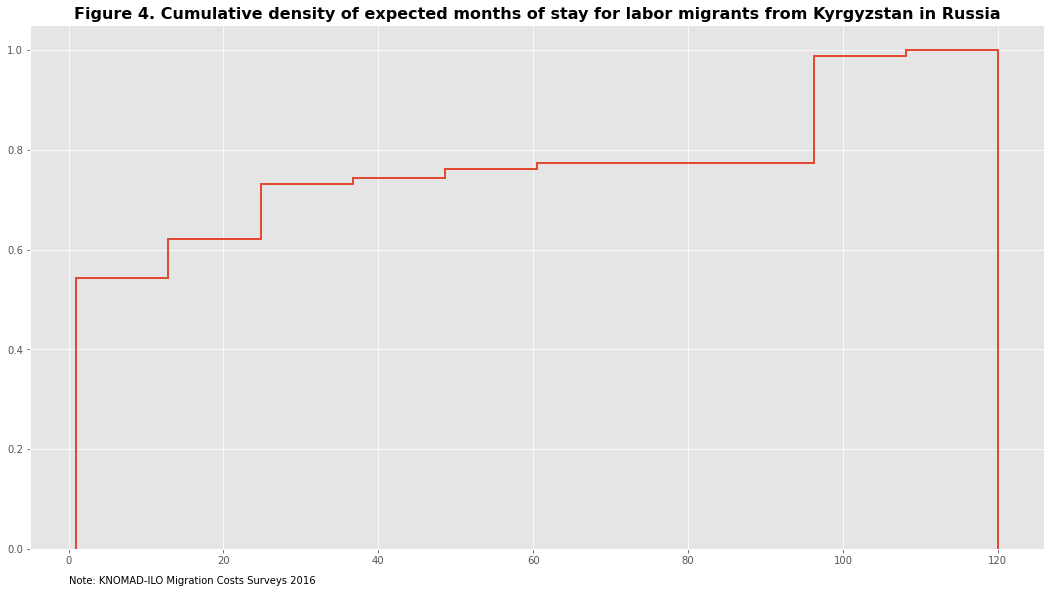

In [9]:
plt.figure(figsize = (14.7,8.27))
(df[df.place_born=='kyrgyzstan']['months_expect']).hist(cumulative=True, 
                                                        density=1, histtype="step", linewidth = 2)

plt.title('Figure 4. Cumulative density of expected months of stay for labor migrants from Kyrgyzstan in Russia', 
          fontsize = 16, fontweight="bold")
plt.text(0, -0.07, 'Note: KNOMAD-ILO Migration Costs Surveys 2016')
plt.tight_layout()
plt.savefig('D:\KGZ_LiK\Chapter_2\Fig_4_migration_spell.jpg', format = 'jpg')
plt.show()

# 5. Wage density

In [10]:
## the data has been compiled from KGZ Lik and Census
df  = pd.read_stata('data_2.dta')
df = df[['ldwage', 'imputed_ldwage', 'ldwagew', 'imputed_ldwagew']]

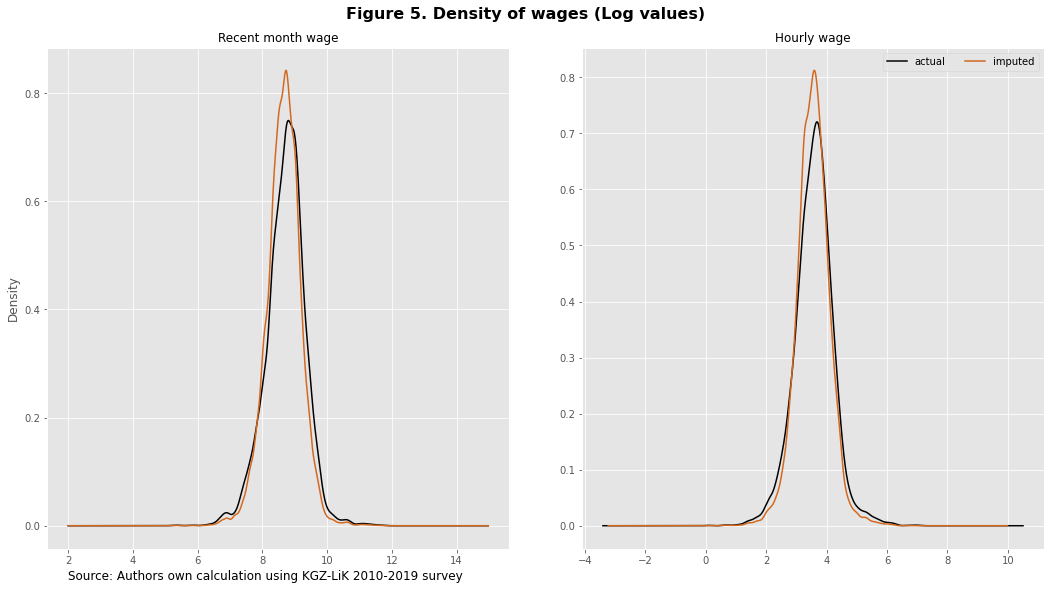

In [11]:
fig, ax = plt.subplots(1,2, figsize = figsize)
fig.suptitle('Figure 5. Density of wages (Log values)', fontsize = 16, fontweight="bold")

df[['ldwage', 'imputed_ldwage']].plot.kde(ax=ax[0], color = ['black', 'chocolate'])
df[['ldwagew', 'imputed_ldwagew']].plot.kde(ax=ax[1], color = ['black', 'chocolate'])
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[1].set_ylabel('')

ax[0].set_title('Recent month wage', fontsize = 12)
ax[1].set_title('Hourly wage', fontsize = 12)

ax[1].legend(['actual', 'imputed'], loc="upper right", ncol = 2) 

ax[0].text(2, -0.1, 'Source: Authors own calculation using KGZ-LiK 2010-2019 survey',
                     fontsize=12)
plt.tight_layout()
plt.savefig('D:\KGZ_LiK\Chapter_2\Fig_5_wage_density.jpg', format = 'jpg')

plt.show()

# 6. Estimates by Education level
The figure uses stata functions

In [12]:
### Connect to Stata
import sys
sys.path.append('D:/Moved_from_C/Stata17/utilities')
from pystata import config
config.init('mp');


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 8-core , expiring  1 Jan 2025
Serial number: 501709301094
  Licensed to: 微软用户
               微软中国

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.



. use "D:\KGZ_LiK\work_data_1.dta", clear

. 
. #Winsorizing wage
Unknown #command
. winsor imputed_ldwage, p(.01) gen(ldw)

. 
. keep if oilrentpercap19!=. & ldw!=. & hours!=.
(12,614 observations deleted)

. 
. 
. #Table 5. Regression by education groups
Unknown #command
. 
. global se cluster skill

. global wage ldw

. global m oilrentpercap19

. global w exp exp2 hours i.educc urban rgc* yrs*

. #global w exp exp2 hours urban 
Unknown #command
. local edulist edc1 edc2 edc3 edc4

. 
. eststo clear

. #drop mpwm
Unknown #command
. foreach num of numlist 1/4 {
  2.         qui probit mp $m $w $f if edc`num' == 1 & ldw!=., vce($se)
  3.         predict mpwm
  4.         qui ivregress 2sls $wage $w $f (mp = mpwm) if edc`num' == 1 & ldw!
> =1, vce($se)
  5.         eststo Model`num'
  6.         qui estat firststage
  7.         mat fstat = r(singleresults)
  8.         qui estadd scalar F1 = fstat[1,4]
  9.         drop mpwm
 10.         }
(option pr assumed; Pr(mp))
(946 missing val

Exception in thread Stata:
Traceback (most recent call last):
  File "D:\Conda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Moved_from_C/Stata17/utilities\pystata\core\stout.py", line 176, in run
    raise SystemError(output)
SystemError: failed to export to the specified format.
r(198);
r(198);



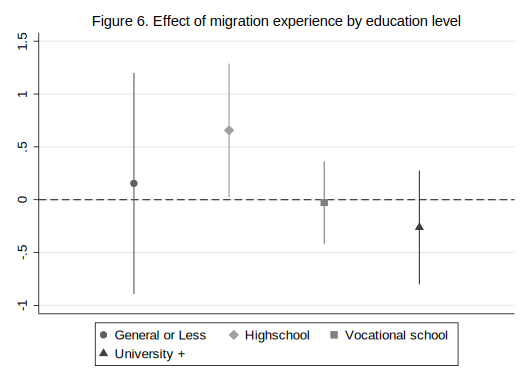

In [15]:
%%stata
use "D:\KGZ_LiK\work_data_1.dta", clear

#Winsorizing wage
winsor imputed_ldwage, p(.01) gen(ldw)

keep if oilrentpercap19!=. & ldw!=. & hours!=.


#Table 5. Regression by education groups

global se cluster skill
global wage ldw
global m oilrentpercap19
global w exp exp2 hours i.educc urban rgc* yrs*
#global w exp exp2 hours urban 
local edulist edc1 edc2 edc3 edc4

eststo clear
#drop mpwm
foreach num of numlist 1/4 {
	qui probit mp $m $w $f if edc`num' == 1 & ldw!=., vce($se)
	predict mpwm
	qui ivregress 2sls $wage $w $f (mp = mpwm) if edc`num' == 1 & ldw!=1, vce($se)
	eststo Model`num'
	qui estat firststage
	mat fstat = r(singleresults)
	qui estadd scalar F1 = fstat[1,4]
	drop mpwm
 	}
esttab, b(4) se(4) ar2 scalar(F1)

#Figure 6. Effect of migration experience by education level
set scheme s2mono

coefplot Model1 Model2 Model3 Model4, keep(mp) yline(0, lpattern(dash)) vertical ///
    title("Figure 6. Effect of migration experience by education level", size(medium)) ///
	plotlabels("General or Less" "Highschool" "Vocational school" "University +") ///
    xlabel(none) legend(label(1 "Legend Label") position(6) cols(3)) ///
	graphregion(color(white) lc(white))
graph export "./Chapter_2/Fig_6_reg_by_educ.jpg", replace


. use "D:\KGZ_LiK\Chapter_2\data_2.dta", clear

. 
. #Winsorizing wage
Unknown #command
. winsor imputed_ldwage, p(.01) gen(ldw)

. 
. keep if oilrentpercap19!=. & ldw!=. & hours!=.
(12,614 observations deleted)

. 
. 
. #Table 5. Regression by education groups
Unknown #command
. 
. global se cluster skill

. global wage ldw

. global m oilrentpercap19

. global w exp exp2 hours urban rgc* yrs*

. #global w exp exp2 hours urban 
Unknown #command
. local edulist edc1 edc2 edc3 edc4

. 
. eststo clear

. #drop mpwm
Unknown #command
. foreach num of numlist 1/4 {
  2.         qui probit mp $m $w $f if edc`num' == 1 & ldw!=., vce($se)
  3.         predict mpwm
  4.         qui ivregress 2sls $wage $w $f (mp = mpwm) if edc`num' == 1 & ldw!
> =1, vce($se)
  5.         eststo Model`num'
  6.         qui estat firststage
  7.         mat fstat = r(singleresults)
  8.         qui estadd scalar F1 = fstat[1,4]
  9.         drop mpwm
 10.         }
(option pr assumed; Pr(mp))
(946 missing values

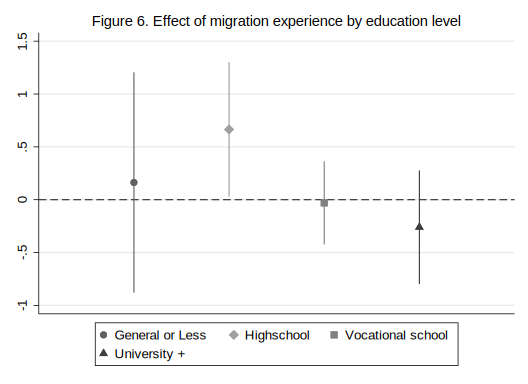

In [17]:
%%stata
use "D:\KGZ_LiK\Chapter_2\data_2.dta", clear

#Winsorizing wage
winsor imputed_ldwage, p(.01) gen(ldw)

keep if oilrentpercap19!=. & ldw!=. & hours!=.


#Table 5. Regression by education groups

global se cluster skill
global wage ldw
global m oilrentpercap19
global w exp exp2 hours urban rgc* yrs*
#global w exp exp2 hours urban 
local edulist edc1 edc2 edc3 edc4

eststo clear
#drop mpwm
foreach num of numlist 1/4 {
	qui probit mp $m $w $f if edc`num' == 1 & ldw!=., vce($se)
	predict mpwm
	qui ivregress 2sls $wage $w $f (mp = mpwm) if edc`num' == 1 & ldw!=1, vce($se)
	eststo Model`num'
	qui estat firststage
	mat fstat = r(singleresults)
	qui estadd scalar F1 = fstat[1,4]
	drop mpwm
 	}
#esttab, b(4) se(4) ar2 scalar(F1)

#Figure 6. Effect of migration experience by education level
set scheme s2mono

coefplot Model1 Model2 Model3 Model4, keep(mp) yline(0, lpattern(dash)) vertical ///
    title("Figure 6. Effect of migration experience by education level", size(medium)) ///
	plotlabels("General or Less" "Highschool" "Vocational school" "University +") ///
    xlabel(none) legend(label(1 "Legend Label") position(6) cols(3)) ///
	graphregion(color(white) lc(white))
graph export "Fig_6_reg_by_educ.jpg", replace

# Done!